#Visualização e Classificação dos Dados da Coluna Vertebral em Python com Pacotes de Data Science
---
- Está codificação visa apresentar a classificação do dataset column_3C.
- São utilizado na classificação os pacotes: numpy, matplotlib, sklearn
- O algoritmo utilizado é Gaussian Naive Bayes

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

### Load na base de dados

In [0]:
#Carregamento do dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/wellingtondantas/Data-Science/master/Datasets/column_3C.csv")

In [0]:
#Apresenta o dataset
dataset = pd.DataFrame(dataset.values, columns=['1','2','3','4','5','6','class'])

In [33]:
dataset

,1,2,3,4,5,6,class
0,39.06,10.06,25.02,29.00,114.41,4.56,1.0
1,68.83,22.22,50.09,46.61,105.99,-3.53,1.0
2,69.30,24.65,44.31,44.64,101.87,11.21,1.0
3,49.71,9.65,28.32,40.06,108.17,7.92,1.0
4,40.25,13.92,25.12,26.33,130.33,2.23,1.0
...,...,...,...,...,...,...,...
304,47.90,13.62,36.00,34.29,117.45,-4.25,3.0
305,53.94,20.72,29.22,33.22,114.37,-0.42,3.0
306,61.45,22.69,46.17,38.75,125.67,-2.71,3.0
307,45.25,8.69,41.58,36.56,118.55,0.21,3.0


###Buscando informações iniciais do dataset

In [34]:
#Verificando a matriz dos dados
print(dataset.shape)

#Mostra se existem valores nulos
print('\n', dataset.isnull().values.any())

#Apresenta as primeiras linhas do dataset
print('\n', dataset.head(5))

#Apresenta as últimas linhas do dataset
print('\n', dataset.tail(5))

#Transformando em matriz para verificação de propriedades
base = np.array(dataset.values)
print('\n', base[0:5])

#Apresentação da quantidade de padrões
print('\n', len(base))

#Verifica a quantidade de classes diferentes
numClasses = np.unique(base[:,-1]).size
print('\n', numClasses)

#Mostrando quais as classes existentes
classes = np.unique(base[:,-1])
print('\n', classes)

#apresenta o balanceamento dos padrões
print('\n Número de Padrões por Classes')
for item in classes:
  print(' {0} : {1} : ({2:2.2f}%)'.format(item, sum(base[:,-1] == item), (sum(base[:,-1] == item)/len(base))*100 ))

(309, 7)

 False

        1      2      3      4       5      6  class
0  39.06  10.06  25.02  29.00  114.41   4.56    1.0
1  68.83  22.22  50.09  46.61  105.99  -3.53    1.0
2  69.30  24.65  44.31  44.64  101.87  11.21    1.0
3  49.71   9.65  28.32  40.06  108.17   7.92    1.0
4  40.25  13.92  25.12  26.33  130.33   2.23    1.0

          1      2      3      4       5     6  class
304  47.90  13.62  36.00  34.29  117.45 -4.25    3.0
305  53.94  20.72  29.22  33.22  114.37 -0.42    3.0
306  61.45  22.69  46.17  38.75  125.67 -2.71    3.0
307  45.25   8.69  41.58  36.56  118.55  0.21    3.0
308  33.84   5.07  36.64  28.77  123.95 -0.20    3.0

 [[ 39.06  10.06  25.02  29.   114.41   4.56   1.  ]
 [ 68.83  22.22  50.09  46.61 105.99  -3.53   1.  ]
 [ 69.3   24.65  44.31  44.64 101.87  11.21   1.  ]
 [ 49.71   9.65  28.32  40.06 108.17   7.92   1.  ]
 [ 40.25  13.92  25.12  26.33 130.33   2.23   1.  ]]

 309

 3

 [1. 2. 3.]

 Número de Padrões por Classes
 1.0 : 59 : (19.09%)
 2.0 : 150

###Buscando correlações e algumas visualizações iniciais

,1,2,3,4,5,6,class
1,1.000000,0.629225,0.718142,0.815120,-0.247644,0.639611,-0.028428
2,0.629225,1.000000,0.434326,0.062655,0.035142,0.399474,-0.210071
3,0.718142,0.434326,1.000000,0.598453,-0.083829,0.532955,0.033485
4,0.815120,0.062655,0.598453,1.000000,-0.344200,0.523602,0.120060
5,-0.247644,0.035142,-0.083829,-0.344200,1.000000,-0.029515,0.228974
6,0.639611,0.399474,0.532955,0.523602,-0.029515,1.000000,-0.123795
class,-0.028428,-0.210071,0.033485,0.120060,0.228974,-0.123795,1.000000


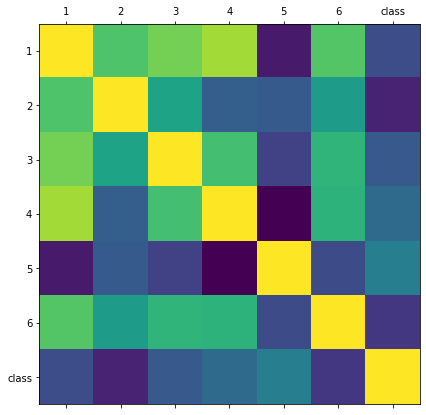

In [35]:
#Identificando a correlação entre as variáveis com os nomes das colunas
def plot_corr(dataset, size=7):
    corr = dataset.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)

#Criando o gráfico
plot_corr(dataset)

#Visualizando a correlação em tabela numericamente
dataset.corr()

###Manipulação do Dataset


In [36]:
################### CUIDADO ! :  Executar somente uma vez #################

#Envia os dados dataset para um novo frame
d = dataset

#Apresentação da nova forma
d

,1,2,3,4,5,6,class
0,39.06,10.06,25.02,29.00,114.41,4.56,1.0
1,68.83,22.22,50.09,46.61,105.99,-3.53,1.0
2,69.30,24.65,44.31,44.64,101.87,11.21,1.0
3,49.71,9.65,28.32,40.06,108.17,7.92,1.0
4,40.25,13.92,25.12,26.33,130.33,2.23,1.0
...,...,...,...,...,...,...,...
304,47.90,13.62,36.00,34.29,117.45,-4.25,3.0
305,53.94,20.72,29.22,33.22,114.37,-0.42,3.0
306,61.45,22.69,46.17,38.75,125.67,-2.71,3.0
307,45.25,8.69,41.58,36.56,118.55,0.21,3.0


In [38]:
# Seleção de atributos preditoras (Nem todos os atributos são importantes)
atributos = d.columns[0:6]

# Variável a ser prevista
rotulo = ['class']

# Criando objetos
X = d[atributos].values
Y = d[rotulo].values
print('\n', X[1:5])
print('\n', Y[1:5])


 [[ 68.83  22.22  50.09  46.61 105.99  -3.53]
 [ 69.3   24.65  44.31  44.64 101.87  11.21]
 [ 49.71   9.65  28.32  40.06 108.17   7.92]
 [ 40.25  13.92  25.12  26.33 130.33   2.23]]

 [[1.]
 [1.]
 [1.]
 [1.]]


In [41]:
#Função de normalização da matriz de dados
normalizar = lambda m : (m-m.min())/(m.max()-m.min())

#Normalização dos dados
for i in range(X.shape[1]):
    X[0:X.shape[0],i]=normalizar(X[0:X.shape[0],i])

print('\n', X[1:5])

#A função (train_test_split) os dados de treinamento e teste:  
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

#Apresentação das dimensões dos conjuntos criados
print('\n', X_train.shape) 
print('\n', Y_train.shape) 
print('\n', X_test.shape) 
print('\n', Y_test.shape)

print('\n')
#Verificando o balanceamento dos padrões de treinamento
for item, string in enumerate(classes):
  print(' {0} : {1} : ({2}%)'.format(string, sum(Y_train == item+1), (sum(Y_train == item+1)/(len(Y_train)))*100))

print('\n')
#Verificando o balanceamento dos padrões de teste
for item, string in enumerate(classes):
  print(' {0} : {1} : ({2}%)'.format(string, sum(Y_test == item+1), (sum(Y_test == item+1)/(len(Y_test)))*100))



 [[0.41165123 0.51393355 0.32298192 0.30760689 0.38617056 0.01752793]
 [0.41618441 0.55734191 0.2712547  0.28937627 0.34186472 0.05183892]
 [0.22723765 0.28938907 0.12815464 0.24699241 0.40961394 0.04418063]
 [0.13599537 0.36566631 0.09951674 0.11993337 0.64791913 0.03093575]]

 (247, 6)

 (247, 1)

 (62, 6)

 (62, 1)


 1.0 : [47] : ([19.02834008]%)
 2.0 : [118] : ([47.77327935]%)
 3.0 : [82] : ([33.19838057]%)


 1.0 : [12] : ([19.35483871]%)
 2.0 : [32] : ([51.61290323]%)
 3.0 : [18] : ([29.03225806]%)


###Classificação dos dados com SVM


In [42]:
#Parâmetros
realizacoes=20

#Matriz que vai salvar medidas de cada realização
medidas = np.zeros([realizacoes,1])

#Instância o classificador svm do pacote sklearn, 
modelo = GaussianNB()

for item in range(realizacoes):

  #Mistura os elementos do conjunto de padrões
  lista=list(range(len(Y_train)))
  random.shuffle(lista)
  X_train=X_train[lista, :]
  Y_train=Y_train[lista, :]

  #O método (fit) é a função de treinamento
  modelo.fit(X_train, Y_train)
  
  #O método (predict) é a função de predição
  classes = modelo.predict(X_test)

  #Calcula a acurácia para uma realização
  medidas[item] = metrics.accuracy_score(classes,Y_test)

  #Apresentação de resultados para uma realização
  print("Acurácia: %3.2f ---> %d realização" % (medidas[item], item+1))

Acurácia: 0.85 ---> 1 realização
Acurácia: 0.85 ---> 2 realização
Acurácia: 0.85 ---> 3 realização
Acurácia: 0.85 ---> 4 realização
Acurácia: 0.85 ---> 5 realização
Acurácia: 0.85 ---> 6 realização
Acurácia: 0.85 ---> 7 realização
Acurácia: 0.85 ---> 8 realização
Acurácia: 0.85 ---> 9 realização
Acurácia: 0.85 ---> 10 realização
Acurácia: 0.85 ---> 11 realização
Acurácia: 0.85 ---> 12 realização
Acurácia: 0.85 ---> 13 realização
Acurácia: 0.85 ---> 14 realização
Acurácia: 0.85 ---> 15 realização
Acurácia: 0.85 ---> 16 realização
Acurácia: 0.85 ---> 17 realização
Acurácia: 0.85 ---> 18 realização
Acurácia: 0.85 ---> 19 realização
Acurácia: 0.85 ---> 20 realização


###Apresentação de Resultados

In [49]:
#Apresenta valores estatísticos
medidas = pd.DataFrame(medidas, columns=['Medidas (%)'])
medidas.describe()*100

,Medidas (%)
count,2.000000e+03
mean,8.548387e+01
std,2.278130e-14
min,8.548387e+01
25%,8.548387e+01
50%,8.548387e+01
75%,8.548387e+01
max,8.548387e+01


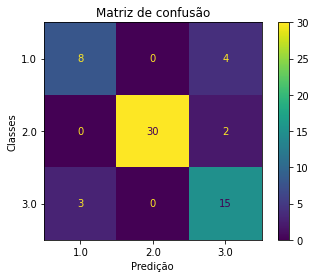

In [44]:
#A matrix de confusão apresenta aonde ocorreram os erros na predição
plot_confusion_matrix(modelo, X_test, Y_test)
plt.title('Matriz de confusão')
plt.ylabel('Classes')
plt.xlabel('Predição')
plt.show()

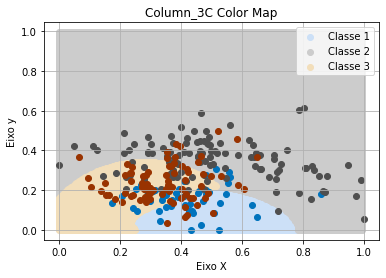

In [48]:
#Colunas selecionadas na análise
x1, x2 = 1 , 3

#Criando matrizes coletoras de pontos
color1, color2, color3, a, b, c = [], [], [], [], [], []

#Treinando
modelo.fit(np.array([X_train[:,x1], X_train[:,x2]]).T, Y_train)

#Criar os pontos de cores
for i in np.arange(0,1.0,0.005):
  for j in np.arange(0,1.0,0.005):

    y = modelo.predict(np.array([[i, j]]))

    if np.array_equal(y, [1]):
        color1.append([i,j])
    elif np.array_equal(y, [2]):
        color2.append([i,j])
    elif np.array_equal(y, [3]):
        color3.append([i,j])
    else:
        raise ValueError('Nenhuma Cor\n')

for item,y in enumerate(Y_train):
    if np.array_equal(y, [1]):
        a.append(item)
    elif np.array_equal(y, [2]):
        b.append(item)
    elif np.array_equal(y, [3]):
        c.append(item)
    else:
        raise ValueError('Houve Erro!\n')

fig, ax = plt.subplots()
plt.title('Column_3C Color Map')
plt.xlabel('Eixo X')
plt.ylabel('Eixo y')

#Transforma lista em matrizes
color1 = np.array(color1)
color2 = np.array(color2)
color3 = np.array(color3)

ax.scatter(color1[:,0], color1[:,1], label='Classe 1', color=[0.80, 0.88, 0.97])
ax.scatter(color2[:,0], color2[:,1], label='Classe 2', color=[0.80, 0.80, 0.80])
ax.scatter(color3[:,0], color3[:,1], label='Classe 3', color=[0.95, 0.87, 0.73])
ax.scatter(X_train[a,x1], X_train[a,x2], color=[0.00, 0.45, 0.74])
ax.scatter(X_train[b,x1], X_train[b,x2], color=[0.31, 0.31, 0.31])
ax.scatter(X_train[c,x1], X_train[c,x2], color=[0.60, 0.20, 0.00])
ax.legend()
ax.grid(True)
plt.show()